In [12]:
import numpy as np
import pandas as pd
import matplotlib
#matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [8]:
data_labeled = np.loadtxt('./training_data.txt', skiprows=1)
data_train = np.loadtxt('./data_train.txt', skiprows=1)
data_test = np.loadtxt('./data_test.txt', skiprows=1)

In [9]:
# # No cross-validation yet
# Y = data_train[:, 0]
# X = data_train[:, 1:]

# Y_test = data_test[:, 0]
# X_test = data_test[:, 1:]

# print(Y.shape)
# print(X.shape)

# N, D = X.shape

# with open('training_data.txt') as f:
#     reader = csv.reader(f, delimiter=" ")
#     labels = next(reader)
# labels = labels[1:]

In [10]:
X = data_labeled[:, 1:]
Y = data_labeled[:, 0]

N, D = X.shape

with open('training_data.txt') as f:
    reader = csv.reader(f, delimiter=" ")
    labels = next(reader)
labels = labels[1:]

In [11]:
wordsums = np.sum(X, axis=0)

In [72]:
# Logistic regression, no normalization
# Optimize C, then re-optimize with reduced features.
# We'll trust cross validation to make hyperparam estimates more accurate.
# First, we'll reduce features by learned weights.
# Second, we'll revisit the idea of reducing the most numerous words again. I don't think it's better.
# Actually, did this in "Eric PCA" notebook. The optimum C was 0.36, between 0.34 and 0.38.
# And then I redid it in "Eric PCA". The optimum C is indeed 0.36 without cross validation

def DoCrossValidate(Cs, kfold, X, Y, regul):
    nhypers = len(Cs)
    logit_models = []
    val_scores = [] #np.zeros((nhypers, kfold))
    
    for c in Cs:
        model = LogisticRegression(penalty=regul, C=c)
        scores = cross_val_score(model, X, Y, cv=kfold)
        logit_models.append(model)
        val_scores.append(scores)
        
    val_scores = np.array(val_scores)
    mean_val_scores = np.mean(val_scores, axis=1)
    c_best_i = np.argmax(mean_val_scores)
    c_best = Cs[c_best_i]
    print(c_best_i, c_best, mean_val_scores[c_best_i])
    print(Cs[c_best_i-1], Cs[c_best_i+1])
    
    return val_scores, mean_val_scores, c_best_i, c_best, logit_models

9 1 0.846600129884
0.1 10


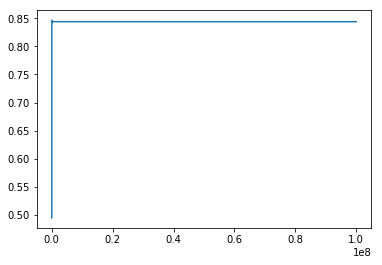

In [42]:
Cs = [10**(i) for i in range(-9, 9)]
kfold = 5

val_scores, mean_val_scores, c_best_i, c_best, logit_models = DoCrossValidate(Cs, kfold, X, Y, 'l1')

plt.plot(Cs, mean_val_scores)

1 0.807142857143 0.846250004866
0.1 1.51428571429


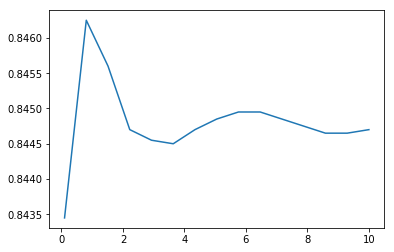

In [43]:
nhypers = 15
Cs = np.linspace(0.1, 10, nhypers) # C must be > 0.
kfold = 5

val_scores, mean_val_scores, c_best_i, c_best, logit_models = DoCrossValidate(Cs, kfold, X, Y, 'l1')

plt.plot(Cs, mean_val_scores)

2 0.3 0.848399754928
0.2 0.4


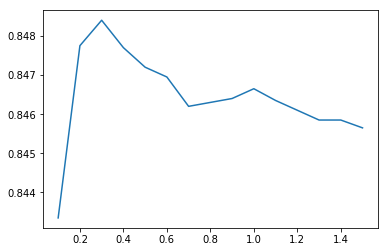

In [44]:
nhypers = 15
Cs = np.linspace(0.1, 1.5, nhypers) # C must be > 0.
kfold = 5

val_scores, mean_val_scores, c_best_i, c_best, logit_models = DoCrossValidate(Cs, kfold, X, Y, 'l1')

plt.plot(Cs, mean_val_scores)

6 0.285714285714 0.848599742444
0.271428571429 0.3


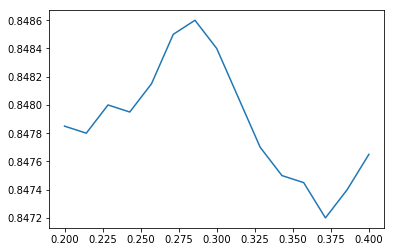

In [45]:
nhypers = 15
Cs = np.linspace(0.2, 0.4, nhypers) # C must be > 0.
kfold = 5

val_scores, mean_val_scores, c_best_i, c_best, logit_models = DoCrossValidate(Cs, kfold, X, Y, 'l1')

plt.plot(Cs, mean_val_scores)

19 0.284358974359 0.848849804959
0.283076923077 0.285641025641


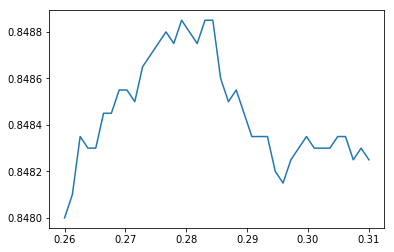

In [46]:
nhypers = 40
Cs = np.linspace(0.26, 0.31, nhypers) # C must be > 0.
kfold = 5

val_scores, mean_val_scores, c_best_i, c_best, logit_models = DoCrossValidate(Cs, kfold, X, Y, 'l1')

plt.plot(Cs, mean_val_scores)

In [60]:
mylogit = logit_models[c_best_i]
mylogit.fit(X, Y)
ws = mylogit.coef_
#ws = mylogit.coef_
print(np.sum(np.equal(ws, 0)))

for i in [ (c_best_i-1), (c_best_i+1) ]:
    neighlogit = logit_models[i]
    neighlogit.fit(X, Y)
    print(np.sum(np.equal(neighlogit.coef_, 0)))

229
230
227


### Now we will do L2-regularized logistic regression on non-zero weight words.

In [69]:
nonzero = np.logical_not(np.equal(ws, 0))[0]
X_nonzero = X[:, nonzero]
print(X_nonzero.shape)

(20000, 771)


In [70]:
val_scores_L1, mean_val_scores_L1, c_best_i_L1, c_best_L1, logit_models_L1 = val_scores, mean_val_scores, c_best_i, c_best, logit_models

8 0.1 0.848849517525
0.01 1


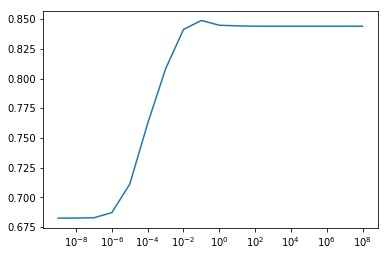

In [74]:
Cs = [10**(i) for i in range(-9, 9)] # C must be > 0.
kfold = 5

val_scores, mean_val_scores, c_best_i, c_best, logit_models = DoCrossValidate(Cs, kfold, X, Y, 'l2')

plt.semilogx(Cs, mean_val_scores)

9 1 0.846600129884
0.1 10


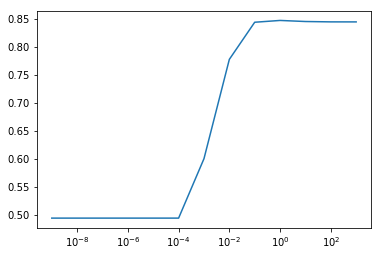

In [75]:
Cs = [10**(i) for i in range(-9, 4)] # C must be > 0.
kfold = 5

val_scores, mean_val_scores, c_best_i, c_best, logit_models = DoCrossValidate(Cs, kfold, X, Y, 'l1')

plt.semilogx(Cs, mean_val_scores)

In [ ]:
# logit_nonzeroL2 = LogisticRegression(C
medianweight = np.percentile()
top50ws = np.absolute(labelweights_logistic['weights'])
                                    